# Predicting heart disease using machine learning 

This notebook looks into using various python based machine learning and data science libraries in an attempt to build a machine learning pipeline capable of prediciting whether or not not someone has heart disease

We are going to take the following steps 
* Problem definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

## Problem Definition
In a statement
> Given clinical data, we have to predict whether a patient has heart disease or not

## Data 
The original data came from: https://archive.ics.uci.edu/dataset/45/heart+disease

A version of it is also available on Kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Evaluation
> If we can reach 95% accuracy of predicting whether a patient has heart disease or not in the proof of concept, we will pursue the project

## Features
This is where you will get different information about the features of available data
**Data dictionary**
1. age - age in years
2. sex
   * 1 = male;
   * 0 = female
4. cp - chest pain type
   * 0 = typical angina
   * 1 = atypical angina
   * 2 = non-anginal pain
   * 3 = asymptomatic
6. trestbps - resting blood pressure
7. chol - serum cholestoral in mg/dl
8. fbs - fasting blood sugar > 120 mg
   * 1 = true;
   * 0 = false
9. restecg - resting electrocardiographic results (values 0,1
    * 0 = normal
    * 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
10. thalach - maximum heart rate achieved
11. exang - exercise induced angina
    * 1 = yes;
    * 0 = no
12. oldpeak = ST depression induced by exercise relative to rest
13. the slope of the peak exercise
    * 0 = upsloping
    * 1 = flatsloping
    * 2 = downslopingg1816
14. ca - number of major vessels (0-3) colored by flouro1917
15. thal: thalium stress level
    * 0 = normal;
    * 1 = fixed defect;
    * 2 = reversable

In [1]:
## Preparing the tools 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

### Load data

In [3]:
df = pd.read_csv("data/heart-disease.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Exploratory data analysis (EDA)

> Goal is to become a subject matter expert on the data we have

Checklist for EDA:
1. What questions are we trying to solve?
2. What kind of data do we have and how we treat different types?
3. What is missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about it?
5. What kind of feature engineering can we do on our data?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

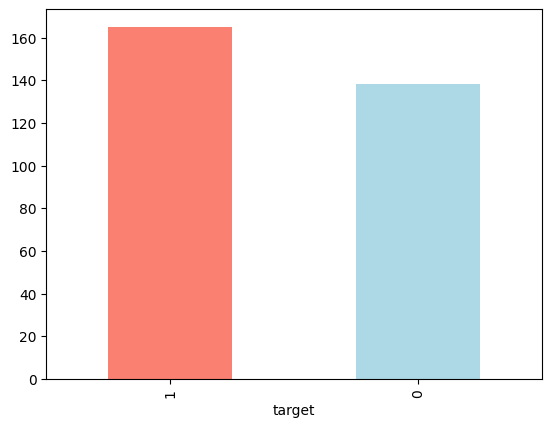

In [8]:
df.target.value_counts()

## relatively balanced classification problem 
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [12]:
# check how many null values do we have in the dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [71]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [72]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [73]:
sex_counts = {
    'Male' : np.array([len(df[(df["sex"] == 1) & (df["target"] == 1)]), len(df[(df["sex"] == 1) & (df["target"] == 0)])]),
    'Female': np.array([len(df[(df["sex"]== 0) & (df["target"] == 1)]), len(df[(df["sex"]== 0) & (df["target"] == 0)])])
} 

In [74]:
sex_counts

{'Male': array([ 93, 114]), 'Female': array([72, 24])}

#### Heart diease frequency according to sex

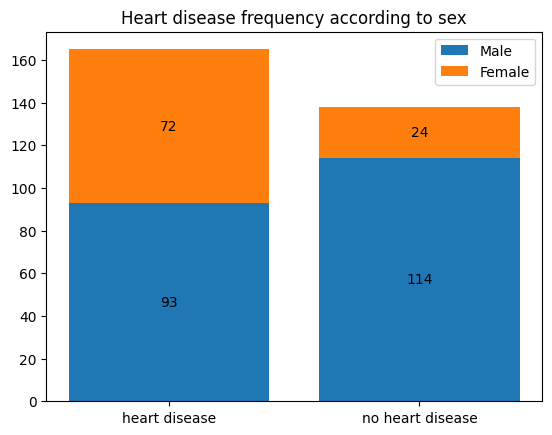

In [98]:
fig, ax = plt.subplots()
bottom = np.zeros(2)
species = (
    'heart disease', 
    'no heart disease'
)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Heart disease frequency according to sex')
ax.legend()

plt.show()

In [83]:
### Compare the sex column with the target column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


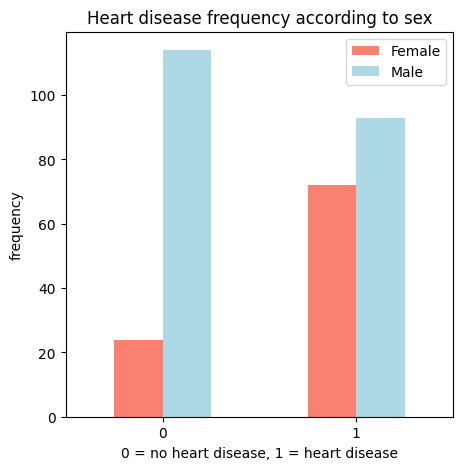

In [99]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(5,5), color=["salmon", "lightblue"])
plt.title('Heart disease frequency according to sex')
plt.xlabel("0 = no heart disease, 1 = heart disease")
plt.ylabel("frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [88]:
percent_of_heart_disease_on_random_guess = {
    "heart_disease": round(len(df[df["target"] == 1]) / len(df), 2) ,
    "no_heart_disease": round(len(df[df["target"] == 0]) / len(df), 2)
}

In [89]:
percent_of_heart_disease_on_random_guess

{'heart_disease': 0.54, 'no_heart_disease': 0.46}

If we randomly predict whether a person has a heart disease or not, we can predict with **54%** probability that the person has heart disease and with **46%** probability that the person has no heart disease

So the purpose of the ML model is to
> **predict whether a person has disease or not, with more accuracy than a random guess (or a baseline model which is guessing at random)**

#### Lets compare age, heart rate, and target

In [101]:
df.thalach.value_counts() # Length shows how many different type of values there are

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

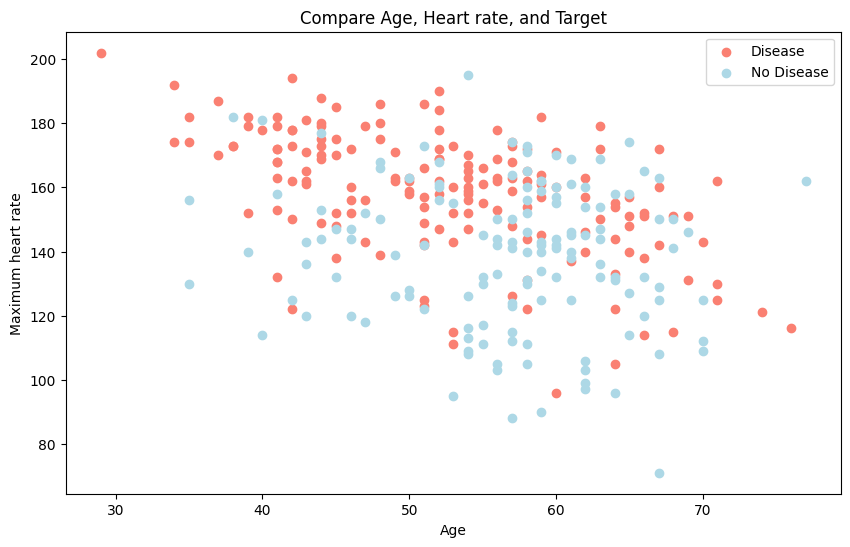

In [114]:
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color="salmon")
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color="lightblue")

plt.xlabel("Age")
plt.ylabel("Maximum heart rate")
plt.title("Compare Age, Heart rate, and Target")
plt.legend(["Disease", "No Disease"]);

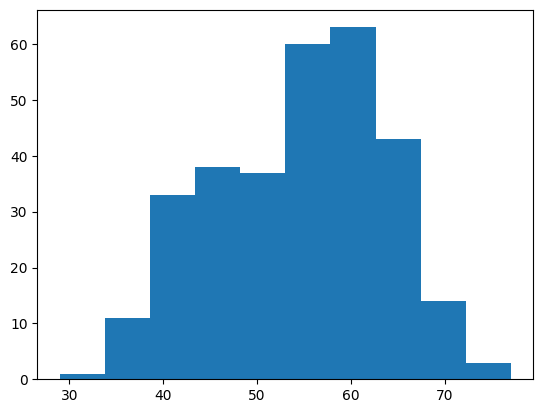

In [119]:
# Check the distribution of the age column
plt.hist(df.age);

#### Chest pain (cp) and heart disease (target) fequency

cp - chest pain type
   * 0 = typical angina
   * 1 = atypical angina
   * 2 = non-anginal pain
   * 3 = asymptomatic

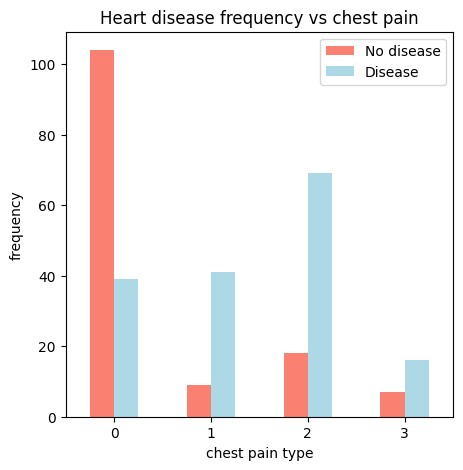

In [123]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(5,5), color=["salmon", "lightblue", "red", "green"])
plt.title('Heart disease frequency vs chest pain')
plt.xlabel("chest pain type")
plt.ylabel("frequency")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

#### Check corelation between dependent and independent variable

In [124]:
# Make a corelation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


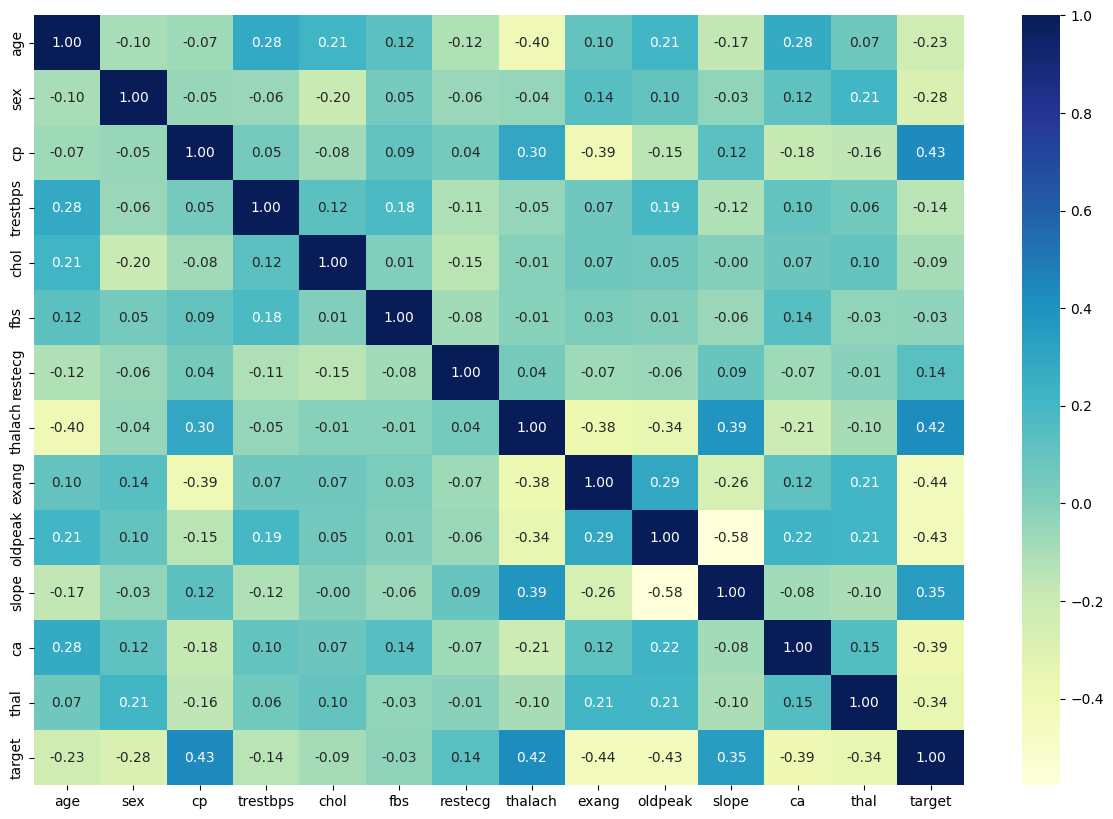

In [127]:
# Make correlation matrix visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu');